In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov9-main
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
/content/gdrive/.shortcut-targets-by-id/1FsxtjdRhKCSS4b319zT5rcL3Dd5sOLs5/yolov9-main
 benchmarks.py	  gelan-c-seg.pt    requirements.txt   train_triple.py
 classify	  hubconf.py	    runs	       utils
 data		  LICENSE.md	    scripts	       val_dual.py
 datasets	  markerpens.yaml   segment	       val.py
 detect_dual.py   models	    test	       val_triple.py
 detect.py	  panoptic	    tools	       yolov9-m-converted.pt
 export.py	  __pycache__	    train_dual.py     'yolov9 run.py'
 figure		  README.md	    train.py	       yolov9-seg.ipynb


In [2]:
%pip install -qr requirements.txt # install dependencies
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Setup complete. Using torch 2.6.0+cu124 (Tesla T4)


In [3]:
%pip install Pillow==9.5.0

In [ ]:
!python segment/train.py --img 416 --batch 32 --epochs 300 --patience 0 --data markerpens.yaml --cfg models/segment/gelan-c-seg.yaml --weights '' --name markerpens-seg --hyp hyp.scratch-high.yaml --cache

2025-05-25 07:41:51.442025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748158911.705526    2949 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748158911.774411    2949 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-25 07:41:52.341190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter you

In [4]:
!python segment/val.py --weights runs/train-seg/markerpens-seg/weights/best.pt --data markerpens.yaml --img 416

segment/val: data=markerpens.yaml, weights=['runs/train-seg/markerpens-seg/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLO 🚀 2025-5-14 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c-seg summary: 414 layers, 27362899 parameters, 0 gradients, 144.2 GFLOPs
100% 755k/755k [00:00<00:00, 26.5MB/s]
val: Scanning /content/gdrive/.shortcut-targets-by-id/1FsxtjdRhKCSS4b319zT5rcL3Dd5sOLs5/yolov9-main/datasets/markerpens/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:26<00:00, 26.47s/it]
                   all    

In [9]:
!python segment/predict.py --weights runs/train-seg/markerpens-seg/weights/best.pt --data markerpens.yaml --conf 0.5 --source test/images

segment/predict: weights=['runs/train-seg/markerpens-seg/weights/best.pt'], source=test/images, data=markerpens.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLO 🚀 2025-5-14 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c-seg summary: 414 layers, 27362899 parameters, 0 gradients, 144.2 GFLOPs
image 1/5 /content/gdrive/.shortcut-targets-by-id/1FsxtjdRhKCSS4b319zT5rcL3Dd5sOLs5/yolov9-main/test/images/249F91DA-50FF-4701-A844-D7C00D581AE6_jpeg.rf.d75415486d221a14ae888b21c5651e23.jpg: 640x480 2 CAPs, 59.5ms
image 2/5 /content/gdrive/.shortcut-targets-by-id/1FsxtjdRhKCSS4b319zT5rcL3Dd5sOLs5/yolov9-main/

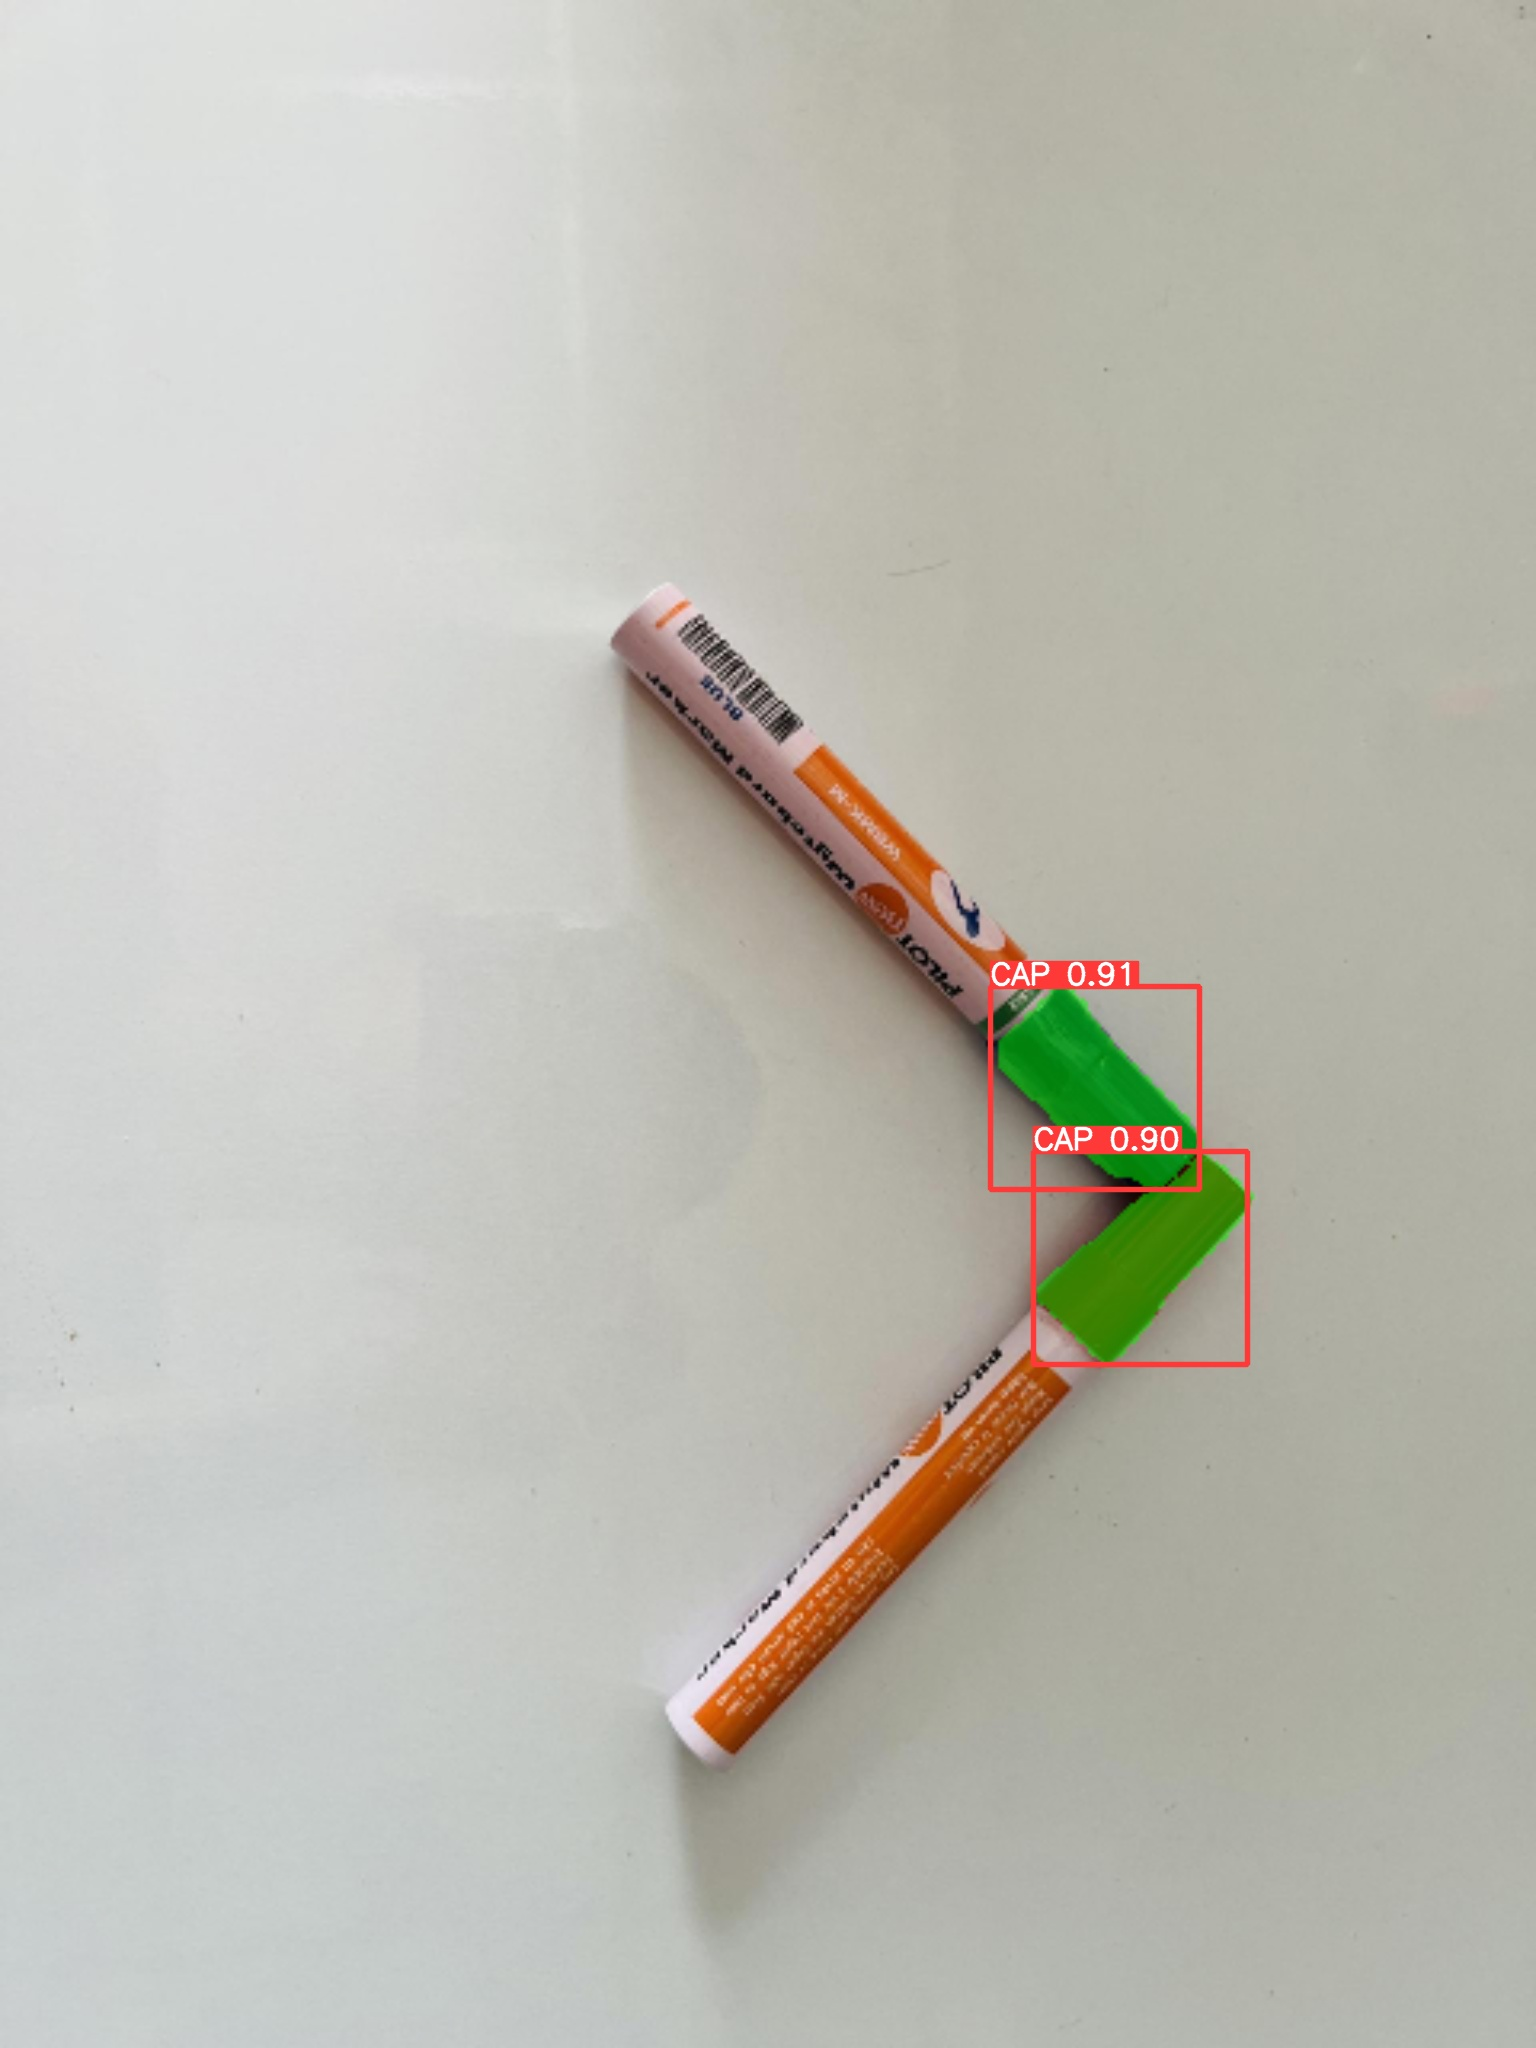

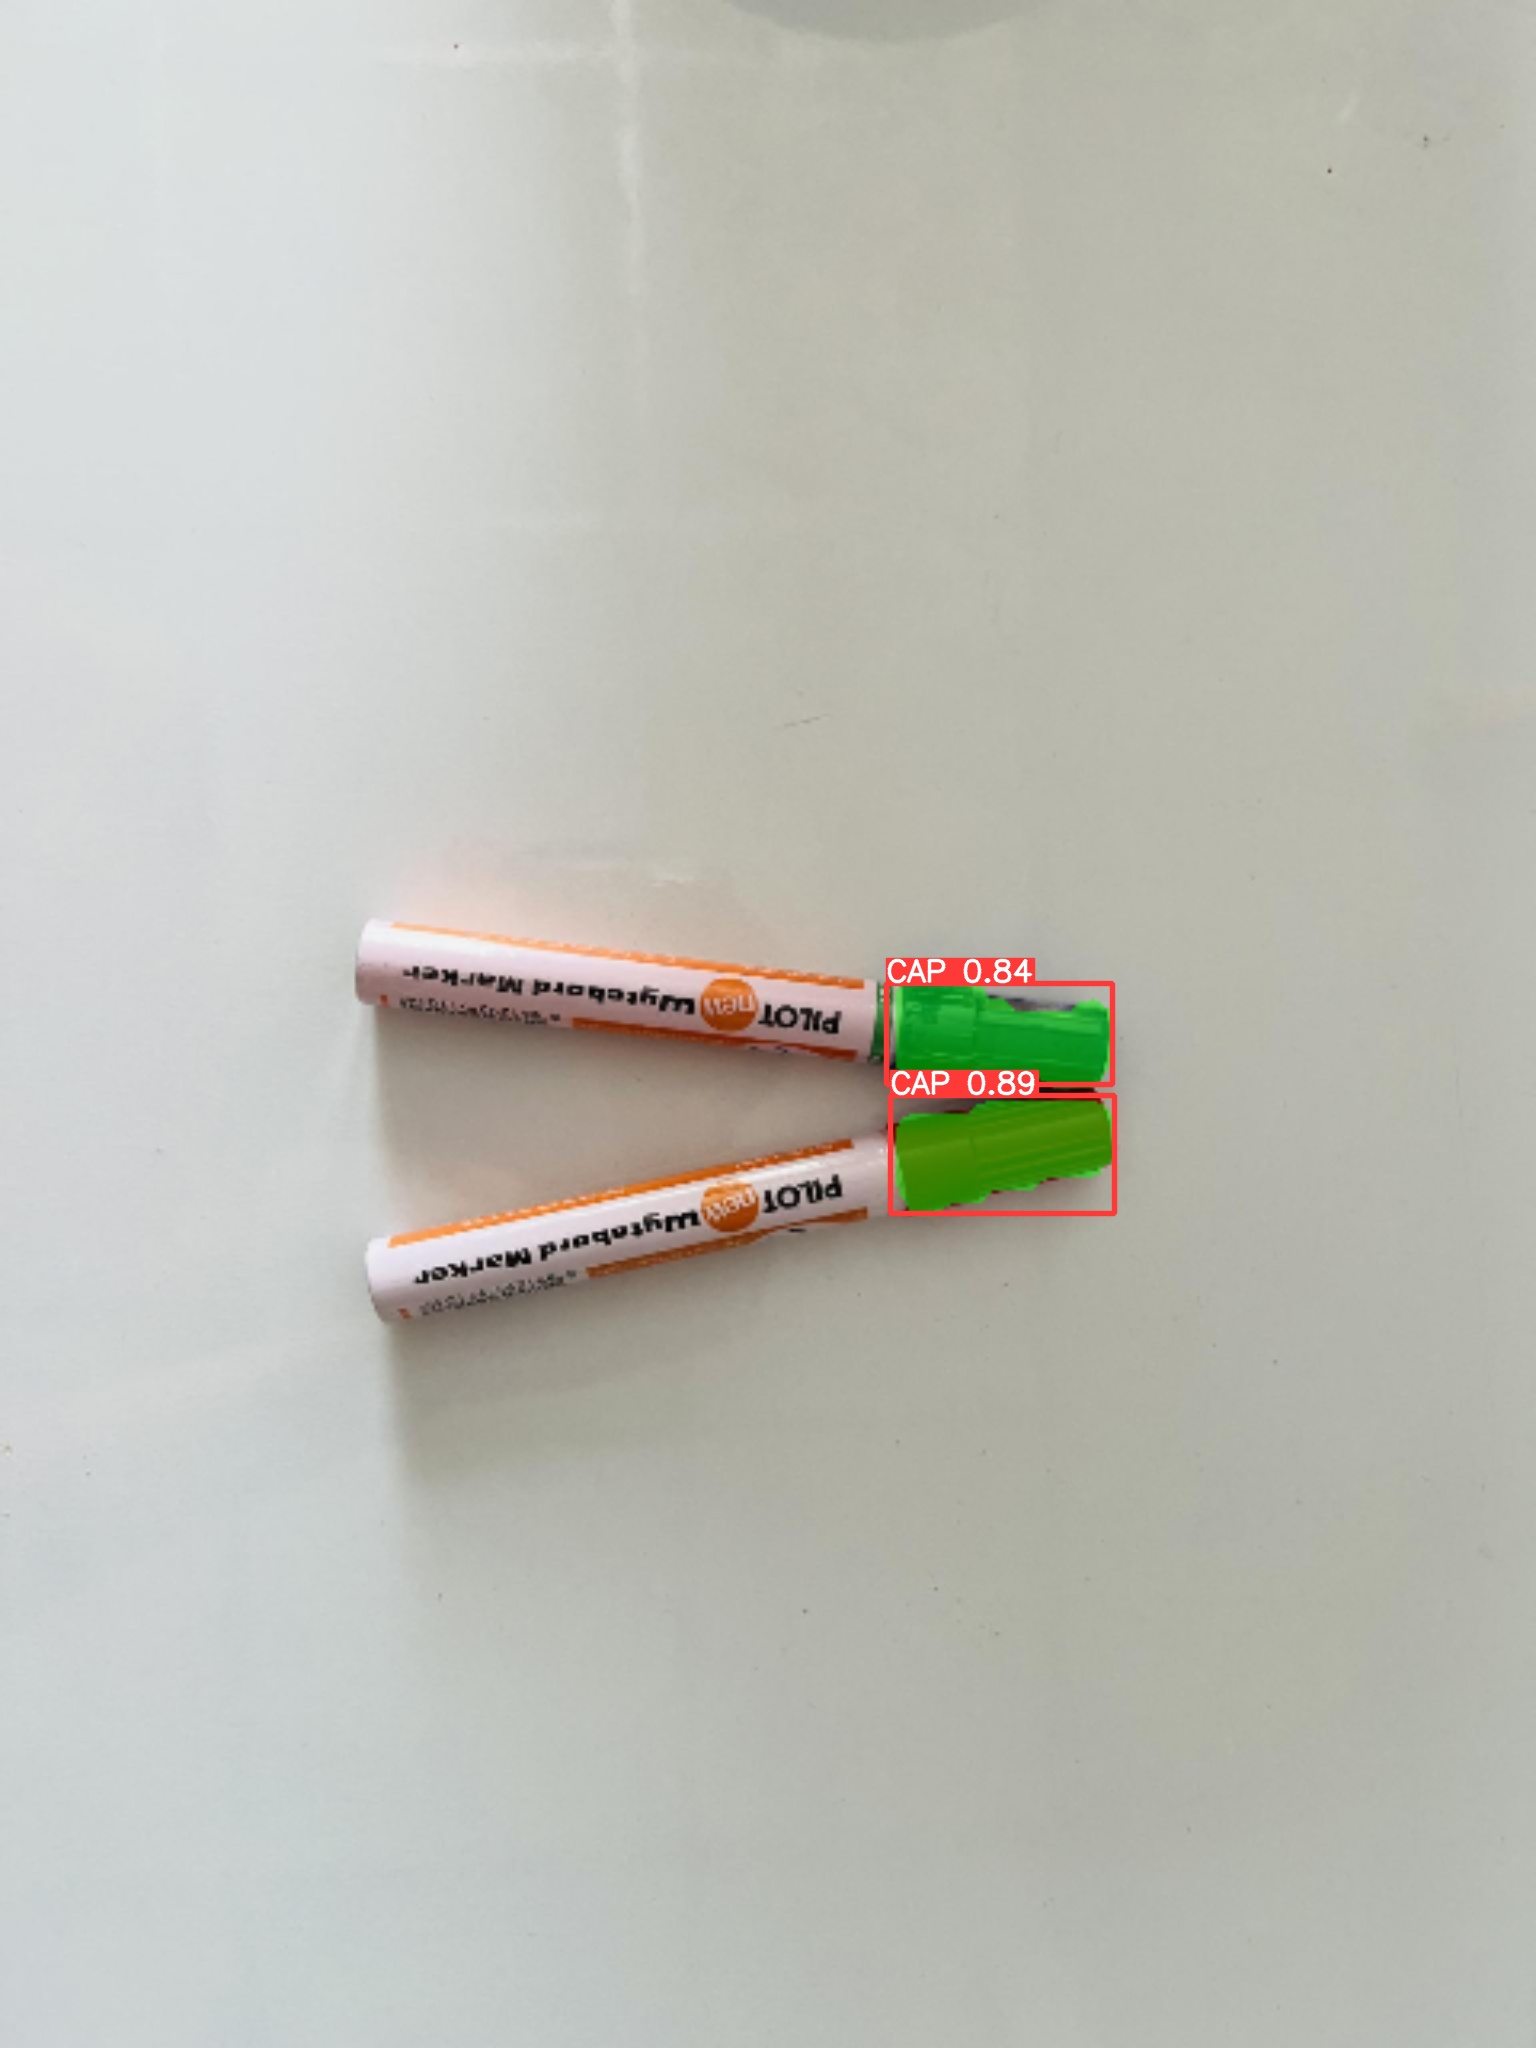

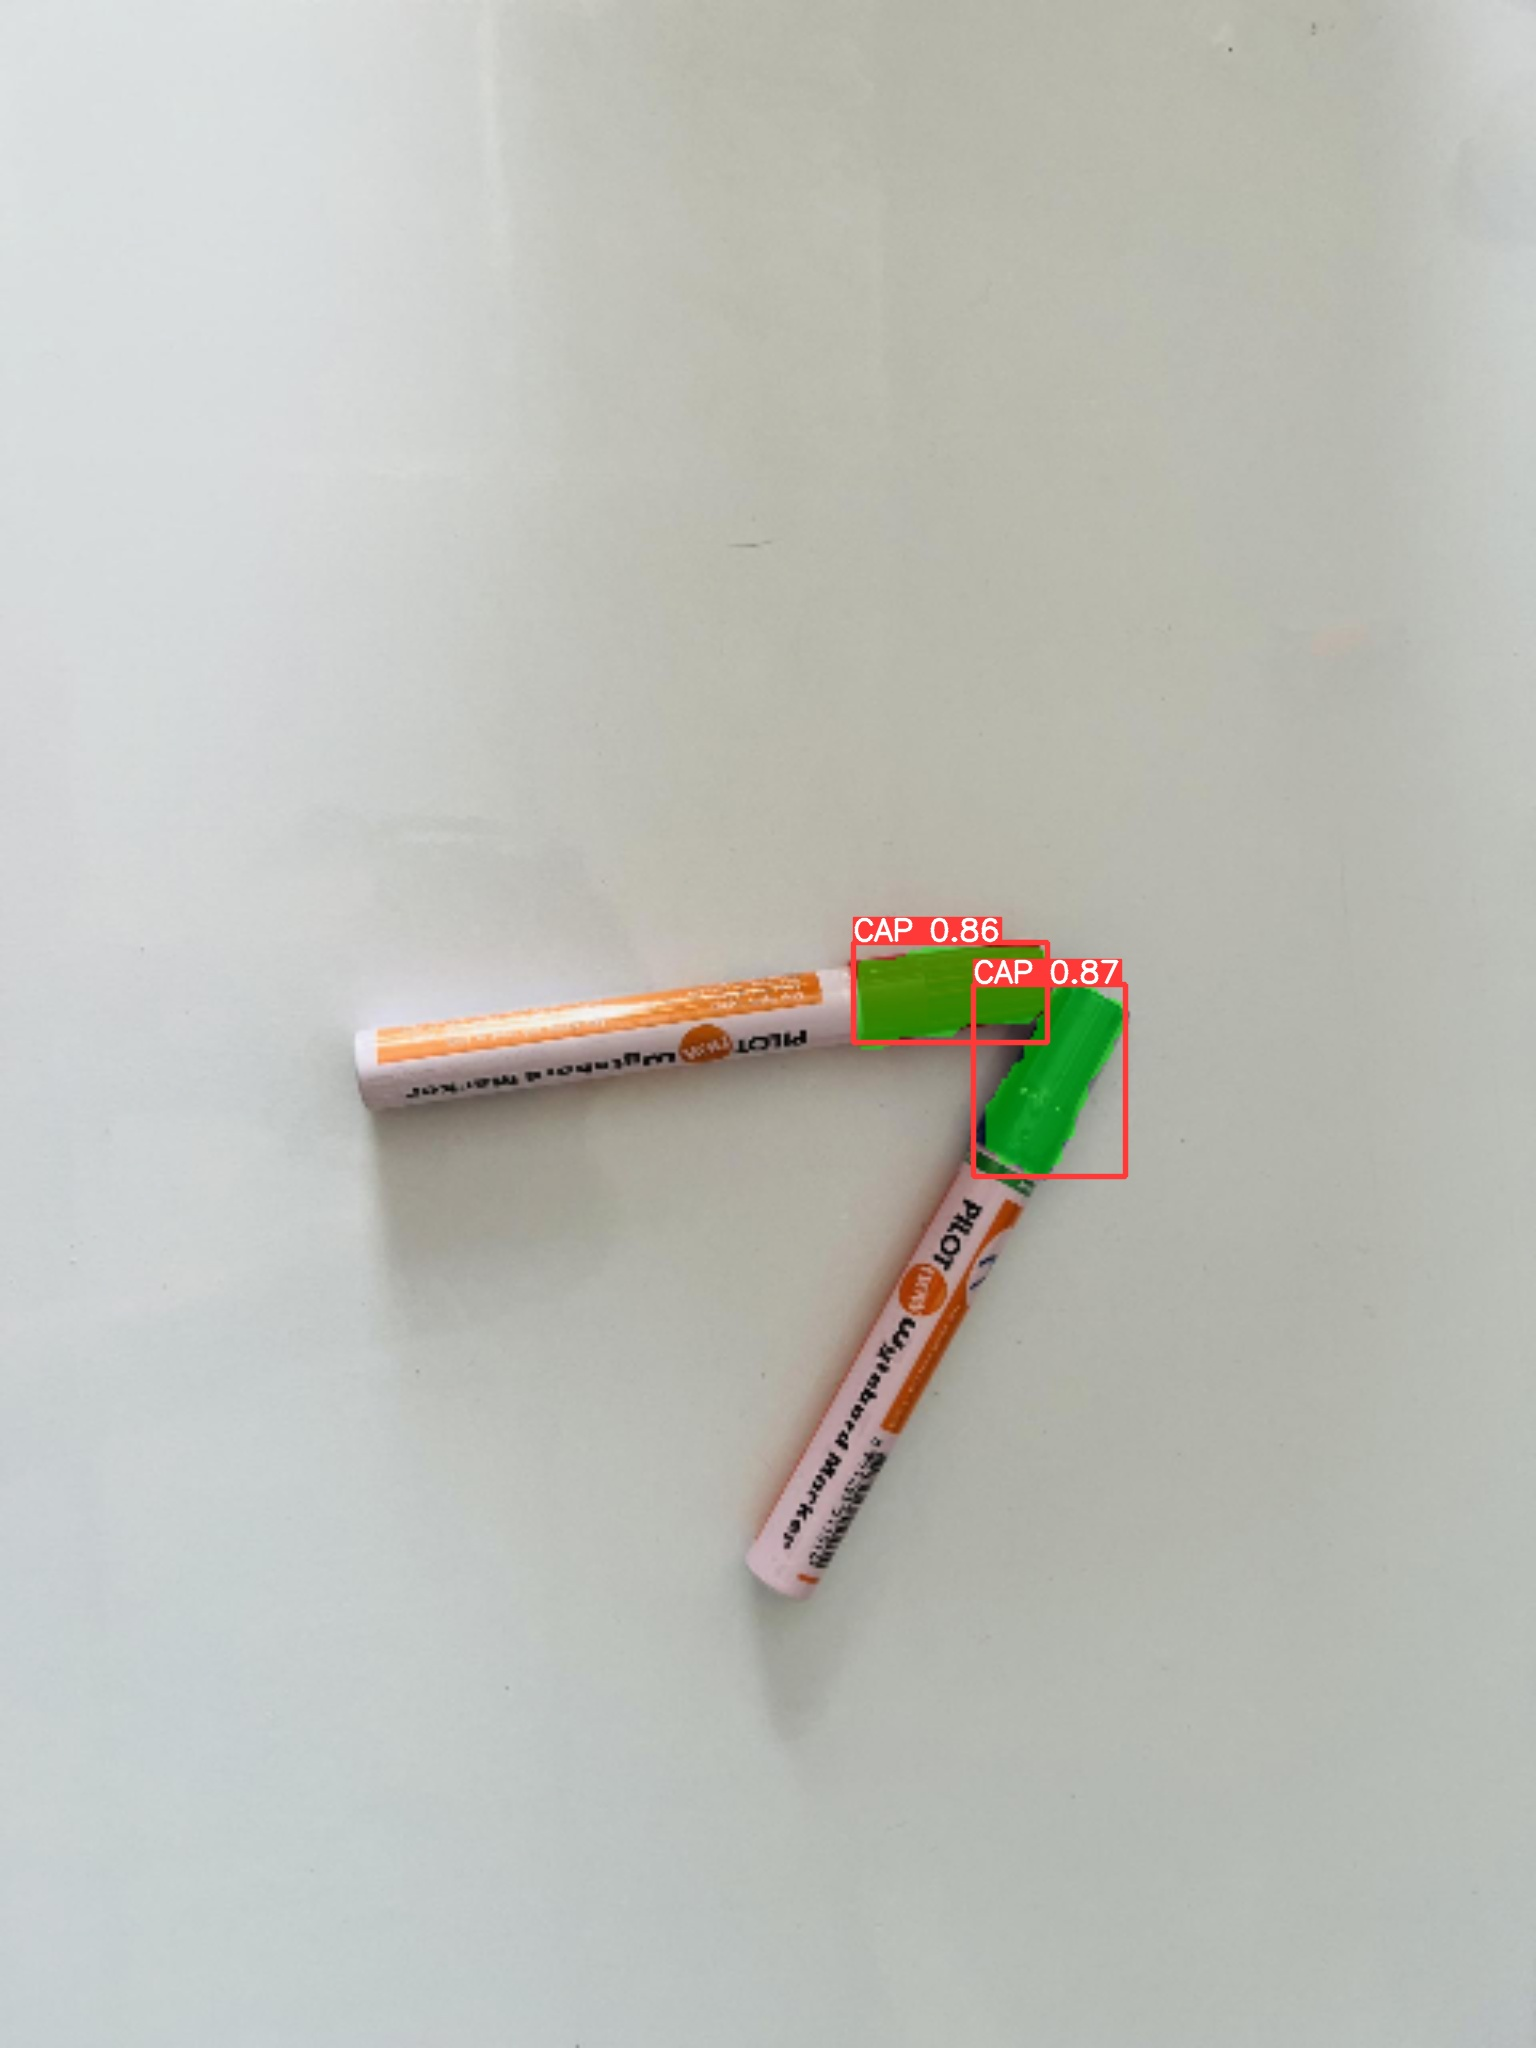

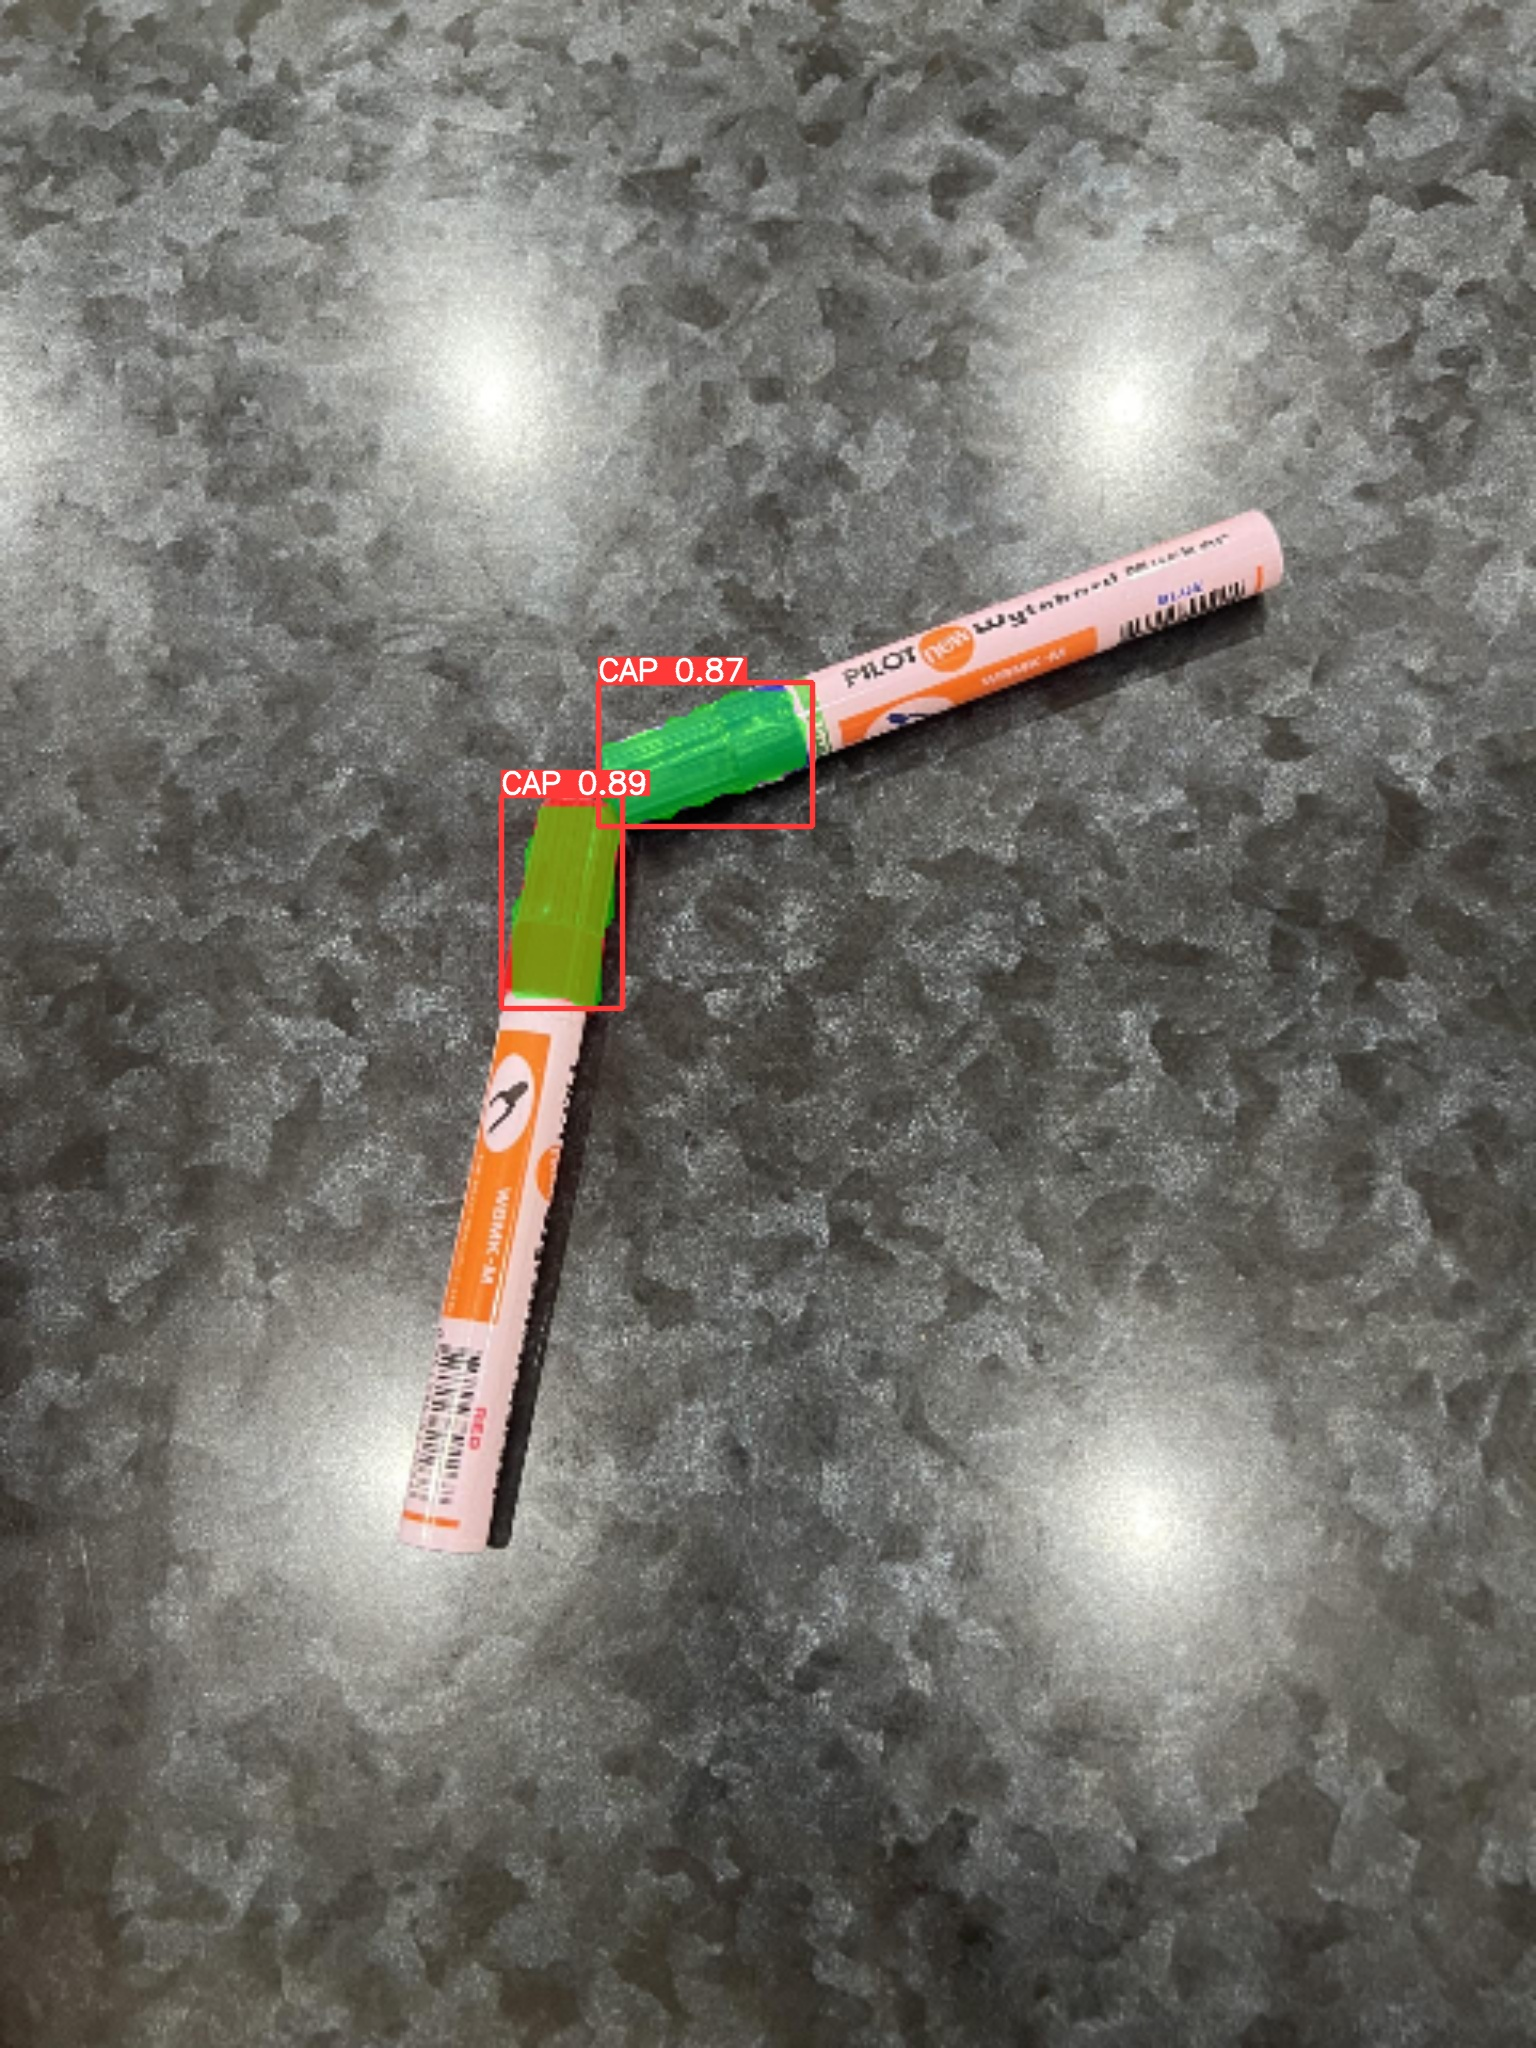

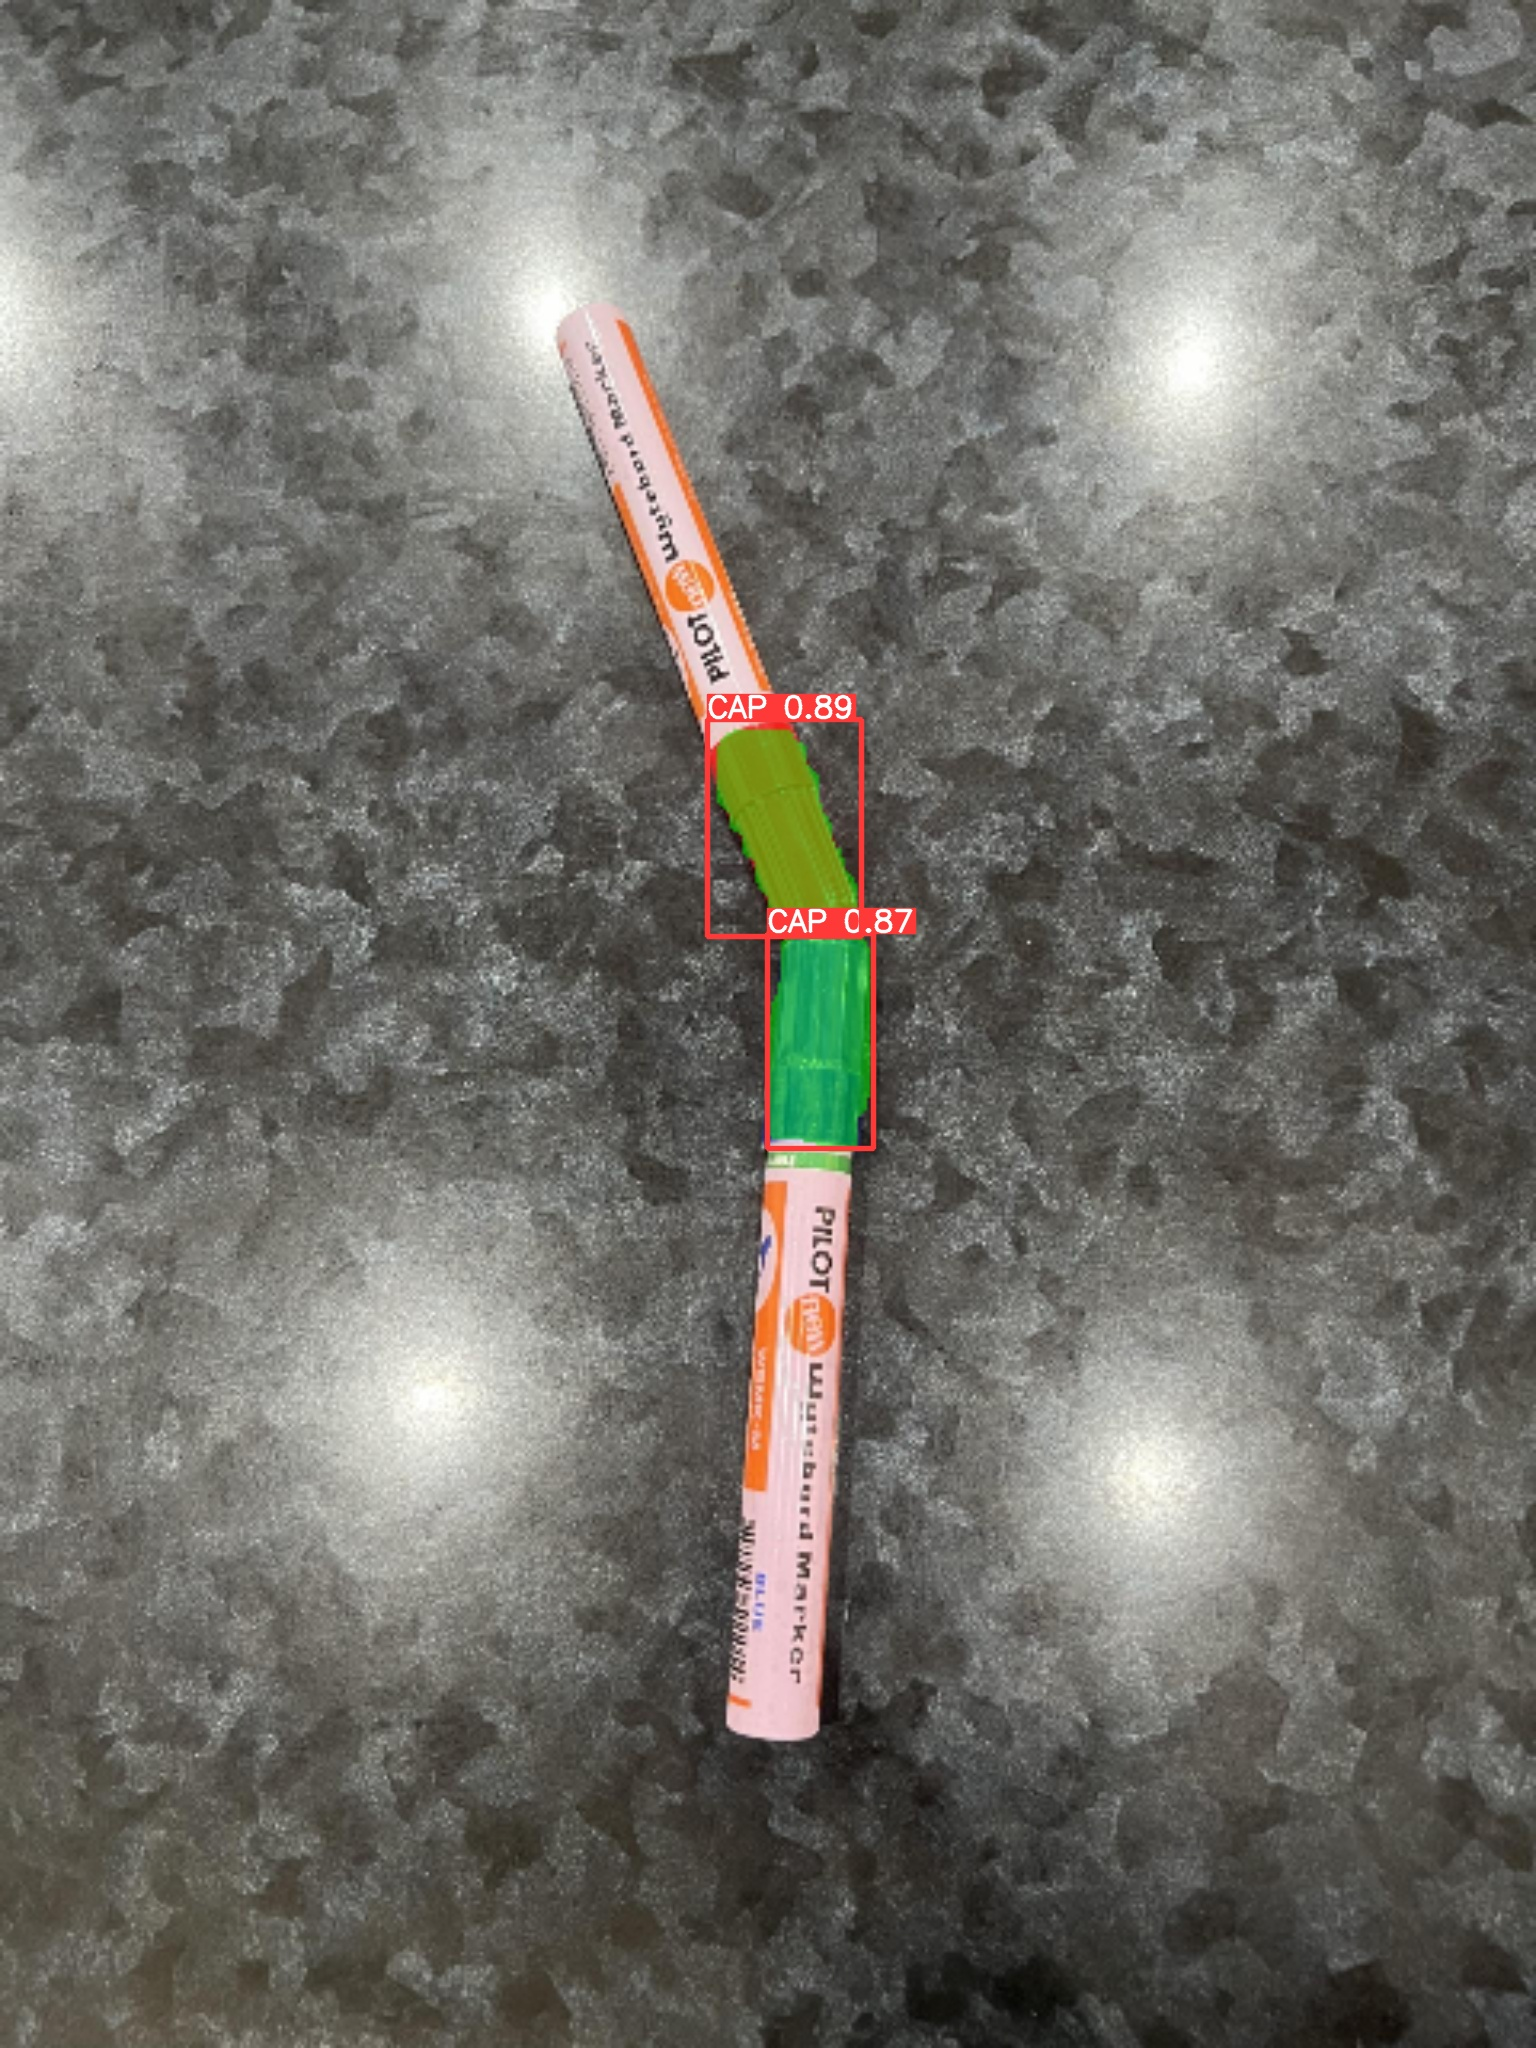

In [10]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/predict-seg/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName, height=600))
    print("\n")